In [1]:
import pandas as pd
import sklearn.metrics
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

## Evaluating Baseline Model Performance

It may be worth evaluating products that have >500 or >100 records in the dataset. We could determine which products we are really good at predicting vs those that are more difficult for the model. 

In [2]:
# Reading in Validation Set Preds
df = pd.read_csv("../input/instacartstuff/validation.csv", index_col=[0])

# Selecting only products with more than 500 records in 'train' data
common_products = (df[df['product_id']
                      .isin(df['product_id'].value_counts()[df['product_id']
                       .value_counts()>500].index.values)])

common_products.head(5)

,user_id,product_id,uxp_times_bought,uxp_reordered_ratio,u_num_of_orders,u_avg_prd,dow_most_orders_u,hod_most_orders_u,prd_count_p,p_reordered_ratio,reordered,aisle_id,department_id,prediction
3,7910,37687,5,0.800000,39,15.025641,0,17,31768,0.669605,0.0,123,4,0
7,86382,43122,4,0.750000,67,8.791045,0,13,37706,0.707898,0.0,24,4,0
8,110580,23909,15,0.933333,27,14.555556,6,17,37091,0.776145,0.0,84,16,1
13,64374,30450,1,0.000000,5,17.000000,0,15,21490,0.566682,0.0,88,13,0
17,99570,16953,1,0.000000,99,4.969697,1,13,20033,0.524285,0.0,88,13,0


In [3]:
print("Overall F1 Score: ", sklearn.metrics.f1_score(df["reordered"], df['prediction']))

Overall F1 Score:  0.3906667106087071


## F1 Score by Product

Looking at the f1_score of each product_id, we may get a sense of which how the model performs on different product_ids.

In [4]:
# Loading product information
products = pd.read_csv("../input/instacart-market-basket-analysis/products.csv")
products.head()

# F1 Score + Count for each product
product_counts = (common_products.groupby('product_id')["prediction"]
                  .agg("size").reset_index(name="count"))

product_scores = (common_products.groupby('product_id')
                  .apply(lambda grp: sklearn.metrics.f1_score(grp["reordered"], grp['prediction']))
                  .reset_index(name='f1_score'))

product_scores = pd.merge(product_scores, products, how='inner', on='product_id')
product_scores = pd.merge(product_scores, product_counts, how='inner', on='product_id')
product_scores.head(5)

,product_id,f1_score,product_name,aisle_id,department_id,count
0,196,0.603989,Soda,77,7,530
1,260,0.366197,Cantaloupe,24,4,546
2,432,0.423237,Vanilla Almond Breeze Almond Milk,91,16,514
3,890,0.225000,Organic Diced Tomatoes,81,15,734
4,2295,0.339623,Yellow Bell Pepper,83,4,772


If we sort by the f1_score of each product, we can see the products that the model performend very well on.

**Interesting Notes**
- Not all the highly scoring products are those with high counts.
- There are recuring aisle_id's and department_id's in the top 10. Further exploring these may give some insight into potential features

In [5]:
product_scores.sort_values('f1_score', ascending=False).head(10)

,product_id,f1_score,product_name,aisle_id,department_id,count
93,27845,0.614035,Organic Whole Milk,84,16,1442
0,196,0.603989,Soda,77,7,530
79,24852,0.597682,Banana,24,4,4755
6,4210,0.588571,Whole Milk,84,16,524
56,19660,0.581395,Spring Water,115,7,640
35,13176,0.581088,Bag of Organic Bananas,24,4,4111
13,5785,0.552553,Organic Reduced Fat 2% Milk,84,16,584
179,47766,0.534463,Organic Avocado,24,4,2695
5,3957,0.530973,100% Raw Coconut Water,31,7,566
85,26369,0.508475,Organic Roma Tomato,83,4,671


We can also see those that we were unable to accurately predict.

**Interesting Notes**

- 6 of the bottom 10 products are Organic Products. Interesting.
- 1/2 of the products are from department 4

In [6]:
product_scores.sort_values('f1_score', ascending=False).tail(10)

,product_id,f1_score,product_name,aisle_id,department_id,count
133,39619,0.129032,Organic Tomato Basil Pasta Sauce,9,9,521
168,45535,0.125000,Organic Low Sodium Chicken Broth,69,15,596
55,19508,0.117647,Corn Tortillas,128,3,552
130,38777,0.114286,Organic Green Seedless Grapes,123,4,510
180,48364,0.112676,Sweet Onion,83,4,562
37,13984,0.096774,Organic Mint,16,4,614
16,7751,0.083333,Tomato Ketchup,72,13,577
134,39812,0.054054,Organic Thyme,16,4,762
126,38159,0.034483,Organic Yellow Peaches,24,4,559
106,31066,0.000000,Aluminum Foil,85,17,577


Visualizing the distribution of f1_scores by product. The graph looks somewhat uniform, maybe slightly right skewed. The most frequent f1_score is similar to the overall f1 score. 

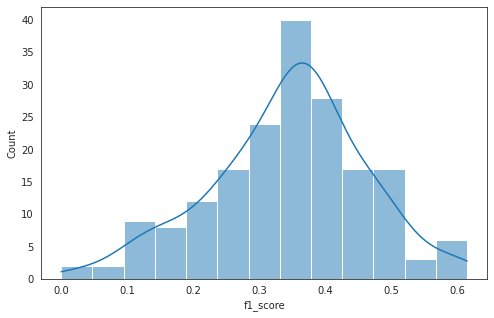

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(x=product_scores["f1_score"], kde=True)
plt.show(sns)

## F1 Score by Department

Looking at the f1_score of each product_id, we may get a sense of which how the model performs on different product_ids.

In [8]:
# Loading product information
departments = pd.read_csv("../input/instacart-market-basket-analysis/departments.csv")

# F1 Score + Count for each product
department_counts = (common_products.groupby('department_id')["prediction"]
                  .agg("size").reset_index(name="count"))

department_scores = (common_products.groupby('department_id')
                  .apply(lambda grp: sklearn.metrics.f1_score(grp["reordered"], grp['prediction']))
                  .reset_index(name='f1_score'))

department_scores = pd.merge(department_scores, departments, how='inner', on='department_id')
department_scores = pd.merge(department_scores, department_counts, how='inner', on='department_id')
department_scores.head(5)

,department_id,f1_score,department,count
0,1,0.361974,frozen,4954
1,3,0.400742,bakery,1587
2,4,0.428316,produce,134127
3,7,0.501899,beverages,6050
4,9,0.208333,dry goods pasta,1588


Doing the same as we did with the product_id, we can sort the departments based on their f1_score.

**Interesting Notes**

- Products that are frequently found in the dataset are highly predictable. 
- Beverages are the most predictable. Was not expecting that.

In [9]:
department_scores.sort_values('f1_score', ascending=False)

,department_id,f1_score,department,count
3,7,0.501899,beverages,6050
9,16,0.448598,dairy eggs,23628
2,4,0.428316,produce,134127
12,20,0.427101,deli,3420
1,3,0.400742,bakery,1587
0,1,0.361974,frozen,4954
10,17,0.328571,household,1343
5,12,0.307937,meat seafood,2211
8,15,0.277393,canned goods,5115
11,19,0.277372,snacks,596
